In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_glass = pd.read_csv("glass.csv")
array = df_glass.values
x = array[:,0:-1]
y = array[:,-1]

In [3]:
df_glass.duplicated().sum()

1

In [4]:
df_glass["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [5]:
x = (x - x.min(axis=0))/(x.max(axis=0)-x.min(axis=0))
x

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True,random_state=19)

In [7]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [8]:
pred = model.predict(x_test)
round(accuracy_score(pred,y_test),2)

0.69

In [9]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       0.63      0.85      0.72        20
         2.0       0.71      0.55      0.62        22
         3.0       0.00      0.00      0.00         4
         5.0       0.71      0.71      0.71         7
         6.0       1.00      0.75      0.86         4
         7.0       0.89      1.00      0.94         8

    accuracy                           0.69        65
   macro avg       0.66      0.64      0.64        65
weighted avg       0.68      0.69      0.68        65



In [10]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
pred = model.predict(x_test)
round(accuracy_score(pred,y_test),2)

0.68

In [12]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       0.60      0.90      0.72        20
         2.0       0.72      0.59      0.65        22
         3.0       0.00      0.00      0.00         4
         5.0       0.60      0.43      0.50         7
         6.0       1.00      0.50      0.67         4
         7.0       0.89      1.00      0.94         8

    accuracy                           0.68        65
   macro avg       0.64      0.57      0.58        65
weighted avg       0.66      0.68      0.65        65



In [13]:
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x_train , y_train, cv = 10)
    k_scores.append(scores.mean())
    print("K value=",k)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print(classification_report(y_test,pred))
    


K value= 1
              precision    recall  f1-score   support

         1.0       0.63      0.85      0.72        20
         2.0       0.71      0.55      0.62        22
         3.0       0.00      0.00      0.00         4
         5.0       0.71      0.71      0.71         7
         6.0       1.00      0.75      0.86         4
         7.0       0.89      1.00      0.94         8

    accuracy                           0.69        65
   macro avg       0.66      0.64      0.64        65
weighted avg       0.68      0.69      0.68        65

K value= 3
              precision    recall  f1-score   support

         1.0       0.60      0.90      0.72        20
         2.0       0.72      0.59      0.65        22
         3.0       0.00      0.00      0.00         4
         5.0       0.60      0.43      0.50         7
         6.0       1.00      0.50      0.67         4
         7.0       0.89      1.00      0.94         8

    accuracy                           0.68        65
 

              precision    recall  f1-score   support

         1.0       0.48      0.70      0.57        20
         2.0       0.67      0.64      0.65        22
         3.0       0.00      0.00      0.00         4
         5.0       0.00      0.00      0.00         7
         6.0       0.00      0.00      0.00         4
         7.0       0.53      1.00      0.70         8

    accuracy                           0.55        65
   macro avg       0.28      0.39      0.32        65
weighted avg       0.44      0.55      0.48        65

K value= 37
              precision    recall  f1-score   support

         1.0       0.50      0.55      0.52        20
         2.0       0.54      0.68      0.60        22
         3.0       0.00      0.00      0.00         4
         5.0       0.00      0.00      0.00         7
         6.0       0.00      0.00      0.00         4
         7.0       0.53      1.00      0.70         8

    accuracy                           0.52        65
   macro av

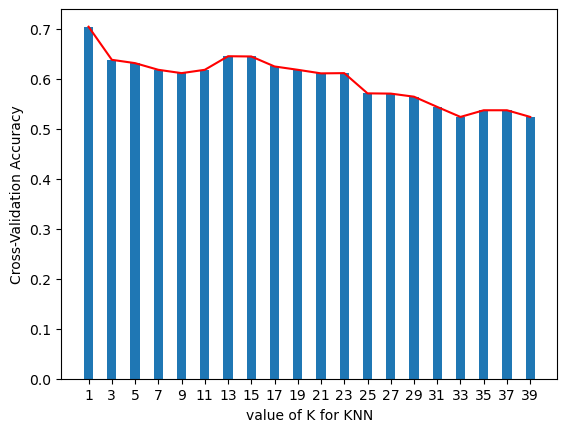

In [14]:
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores, color = "red")
    
plt.xlabel('value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(k_range)
plt.show()

In [15]:
np.argmax(k_scores)

0

In [16]:
k_range[0]

1

In [17]:
k_scores[1]

0.6380952380952382

In [18]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
pred = model.predict(x_test)
accuracy_score(pred,y_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       0.63      0.85      0.72        20
         2.0       0.71      0.55      0.62        22
         3.0       0.00      0.00      0.00         4
         5.0       0.71      0.71      0.71         7
         6.0       1.00      0.75      0.86         4
         7.0       0.89      1.00      0.94         8

    accuracy                           0.69        65
   macro avg       0.66      0.64      0.64        65
weighted avg       0.68      0.69      0.68        65

